<a href="https://colab.research.google.com/github/danielmnunes/Introducao-a-Computacao/blob/master/Exercicios%20de%20R/ExerciciosDeR_Lista_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="150px" src="https://blog-static.infra.grancursosonline.com.br/wp-content/uploads/2015/09/03174643/UFC2.png" align="right" hspace="30px" vspace="0px"></p>  

<h1>
<strong> Universidade Federal do Ceará </strong>  <br>
Bacheralado em Matemática Industrial  <br>
Exercícios de R - Lista 1 <br>
Disciplina: Introdução à Computação  <br>
Professor: Ronald Targino <br>
Aluno: Daniel Magalhães Nunes
</h1>

In [40]:
rm(list=ls())

In [41]:
valor = sample(seq(from = 500, to = 4000, by=100), 100, replace = TRUE)
valor

[1] 2500  700 3900 3800 1100 2900 3400 1300 3200 1700 1300 1200  500 3400 1900
 [16] 1100 1600 2800 1300 1800 2100 1000 2000 2600  500  700 1600 1700 1300 2900
 [31]  500 2400  900 3700 4000 1600 1400  600 1600 3600 2100 3100  500 1000 3300
 [46] 3400 3200  700 3600 1600 2700 2000 3900 1400 1300 3600 3200 1700 1200 1600
 [61] 1000 1500 3300 2500 3000 1500 2500 2200 3900 3300 1200 1300 1600  800 1100
 [76] 1300 3300 3200 2200  600 3100 2100 3800 1100 3800  500 1300 3200 3100 1900
 [91] 1400 3900 2100  600 3800  900 2500 1300 3300 2600

In [42]:
produto = sample( c("tv", "notebook", "impressora", "smartphone"), prob = c(0.3, 0.2, 0.1, 0.4), size = 100, replace = TRUE)
produto

[1] "tv"         "notebook"   "tv"         "smartphone" "notebook"  
  [6] "smartphone" "notebook"   "tv"         "smartphone" "tv"        
 [11] "smartphone" "tv"         "smartphone" "tv"         "smartphone"
 [16] "smartphone" "notebook"   "smartphone" "smartphone" "smartphone"
 [21] "smartphone" "smartphone" "smartphone" "smartphone" "tv"        
 [26] "smartphone" "impressora" "impressora" "tv"         "smartphone"
 [31] "smartphone" "smartphone" "notebook"   "tv"         "smartphone"
 [36] "smartphone" "impressora" "smartphone" "smartphone" "notebook"  
 [41] "notebook"   "tv"         "smartphone" "notebook"   "smartphone"
 [46] "impressora" "smartphone" "tv"         "notebook"   "tv"        
 [51] "impressora" "impressora" "smartphone" "tv"         "tv"        
 [56] "tv"         "smartphone" "smartphone" "tv"         "smartphone"
 [61] "smartphone" "impressora" "tv"         "notebook"   "smartphone"
 [66] "smartphone" "tv"         "tv"         "smartphone" "smartphone"
 [71] "smartphone" "notebook"   "smartphone" "smartphone" "impressora"
 [76] "smartphone" "notebook"   "smartphone" "smartphone" "smartphone"
 [81] "smartphone" "impressora" "impressora" "smartphone" "notebook"  
 [86] "tv"         "smartphone" "tv"         "tv"         "smartphone"
 [91] "smartphone" "notebook"   "smartphone" "smartphone" "smartphone"
 [96] "smartphone" "smartphone" "tv"         "smartphone" "smartphone"

In [43]:
quantidade = sample(10:4000, 100)
quantidade

[1] 1660 1036 3770 2065 2111 2969 1142  450 3503 3533 3246 2498 3173 2762  341
 [16] 3546 2906 1921 1113 1505 3262 3658 2119 1271 2323 1208 4000  639 1552 3184
 [31]  195 3577 1338 2622  150 2559 3543 2829 1850  799 3850  665 2393 3489  687
 [46] 2862 1685 2363  775 2079 3923 1302  934  319 2614 3748 1693 1511 1108 1726
 [61] 2073 1873 1407 1836 2697 1019 3105  907 2339 1185 3910  187 2000 3692 2027
 [76] 3835 3599 2781 2976 3531  732 1054 1386 1336  995 1761 2496 2198 1803 3675
 [91] 3877 1323 2561 3096 1888 1695 1258 3232 1659  566

In [44]:
mes = sample(1:12, 100, replace = TRUE)
mes

[1]  3  7 12  5  6  9  7  1  1  5  4  9 10  9  5  3  7  8  3 11  6  7  2  5  8
 [26]  2  3  3  9  6 11  4  1 11 12  3  3  6 10  8  8  8  3  2  4 11  4  2  3  2
 [51]  8 11  1  9  2  8  8  8  3 11  7  2 12  1  9 12 12  2  5  8 12  8  3  2  6
 [76] 11  7  9  3  1  9  8 11  4 11  3 10 12 12  7 12  2  2  2  5  2 10  2  3  4

In [46]:
margem = runif(min = 1.0, max = 35.0, n=100)
margem

[1] 28.596983 30.852189 24.949275 30.709243  6.551595  5.393137 16.912891
  [8] 23.210277 30.936133 25.562835 25.219912 30.426506 31.504872 11.122717
 [15] 17.835167  6.589404 34.159905 31.970141 33.567556 33.762334 27.754579
 [22] 32.154730 24.023019 27.921589 13.265685 20.272144  4.563454 17.583489
 [29] 15.066423  2.977422 13.479861 15.362557 15.221922  2.366388 28.560211
 [36] 23.509588 13.628139  4.834292 14.859459 10.011684 22.508959 30.374598
 [43] 24.729042 12.079344 15.520552 34.690549 28.806430  9.488837 31.641571
 [50] 19.908834  6.058271  9.882164  7.504039 34.621997 31.735090  3.470161
 [57] 22.810440 24.202552 17.757998 14.996700 32.912860 16.193243  9.106073
 [64] 16.621088 23.735465 34.164972  8.542689 22.050116 24.214080  1.981757
 [71] 15.178079 12.044900 27.100310 34.749205 34.271196 11.108799 27.940462
 [78] 10.433177 23.397117 31.653223 26.105090 12.944861 10.455914 34.598854
 [85] 20.784570  1.932008 25.886041  1.729689 24.543383 32.881855 14.347860
 [92] 22.668630  6.680133 32.641689 16.174158 23.517875 22.885401 29.591005
 [99] 14.469494 18.300884

In [47]:
ano = sample(c(2017, 2018, 2019), prob = c(0.5, 0.2, 0.3), 100,replace = TRUE)
ano

[1] 2017 2018 2018 2017 2019 2019 2019 2018 2019 2017 2019 2018 2017 2017 2019
 [16] 2017 2017 2019 2017 2018 2019 2017 2017 2018 2018 2019 2018 2018 2019 2017
 [31] 2019 2017 2017 2017 2017 2017 2017 2019 2019 2017 2018 2017 2019 2017 2019
 [46] 2019 2019 2017 2019 2017 2017 2019 2017 2017 2017 2019 2017 2017 2017 2019
 [61] 2017 2017 2018 2018 2017 2017 2017 2017 2017 2019 2018 2019 2017 2017 2017
 [76] 2019 2018 2017 2017 2019 2019 2019 2017 2019 2018 2017 2018 2017 2017 2017
 [91] 2019 2019 2017 2017 2017 2018 2017 2019 2017 2017

In [48]:
ls()

[1] "ano"        "margem"     "mes"        "produto"    "quantidade"
[6] "valor"

In [49]:
vendas =  data.frame(ano, mes, produto,quantidade, valor, margem)

In [50]:
rm(ano, mes, produto, quantidade, valor, margem)

In [51]:
ls()

[1] "vendas"

In [54]:
vendas$lucro = vendas$quantidade *  vendas$valor * vendas$margem

In [56]:
head(vendas, 5)

,ano,mes,produto,quantidade,valor,margem,lucro
,<dbl>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,2017,3,tv,1660,2500,28.596983,118677480
2,2018,7,notebook,1036,700,30.852189,22374008
3,2018,12,tv,3770,3900,24.949275,366829188
4,2017,5,smartphone,2065,3800,30.709243,240975426
5,2019,6,notebook,2111,1100,6.551595,15213459


In [57]:
ls()

[1] "vendas"

In [61]:
install.packages("dplyr");

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [60]:
library(dplyr);

In [85]:
vendas %>% group_by(ano) %>% summarise( min(lucro) , mean(lucro), median(lucro), max(lucro), sd(lucro))

,ano,min(lucro),mean(lucro),median(lucro),max(lucro),sd(lucro)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2017,1701133,80170753,66268684,240975426,57879517
2,2018,13578012,96676756,76290793,366829188,104117453
3,2019,1314286,77617802,46822191,346781682,86197727


In [86]:
stats_lucro = vendas %>% group_by(ano) %>% summarise( min(lucro) , mean(lucro), median(lucro), max(lucro), sd(lucro))

In [89]:
lucro2017 = vendas %>% filter(ano == 2017)
lucro2018 = vendas %>% filter(ano == 2018)
lucro2019 = vendas %>% filter(ano == 2019)

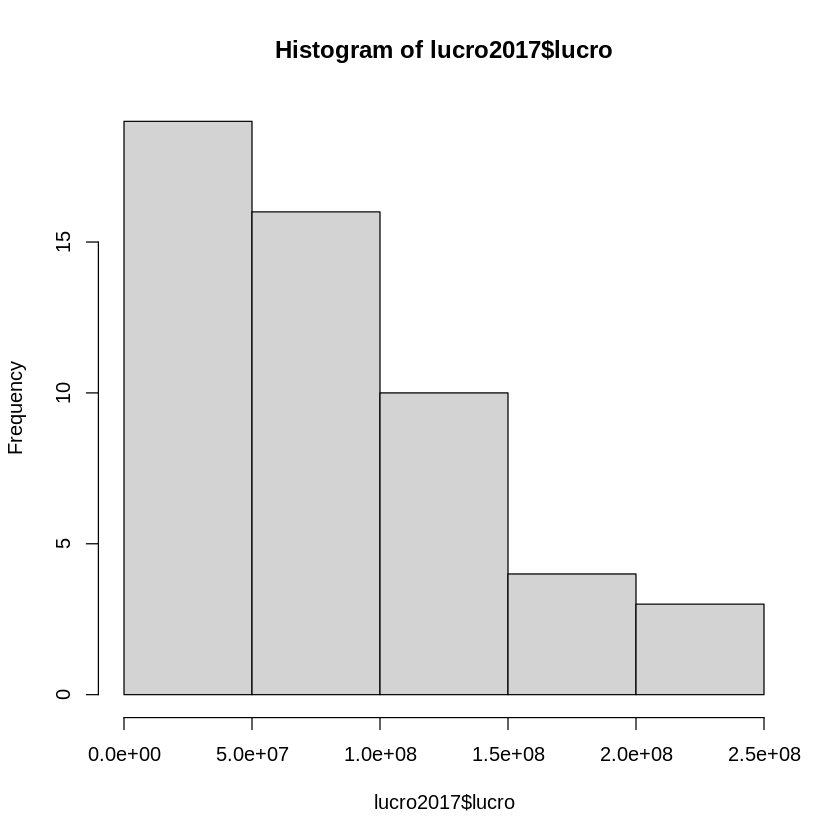

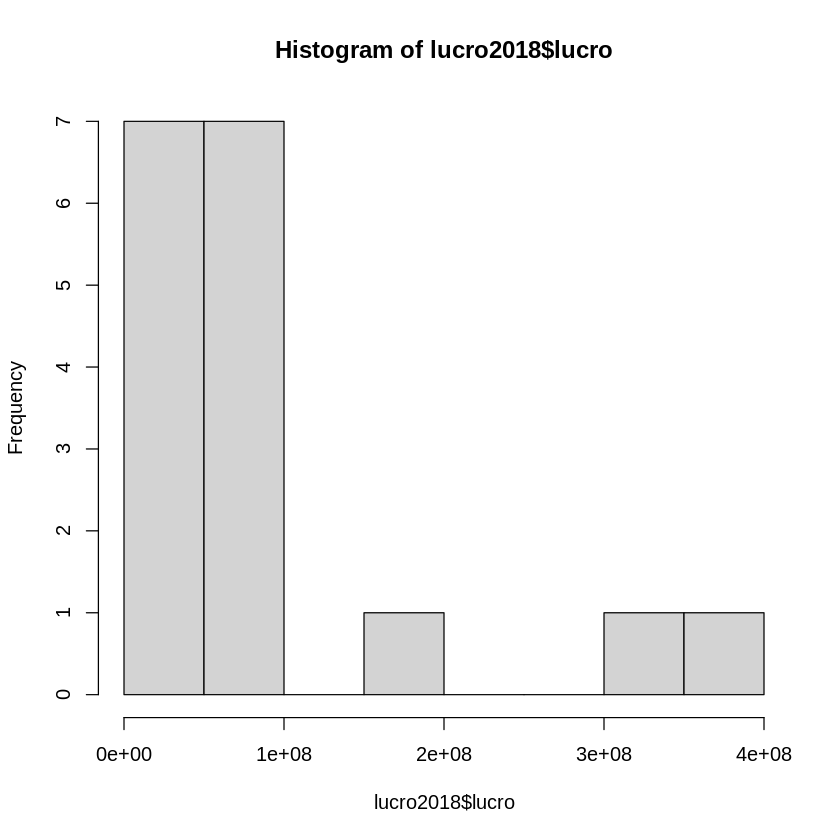

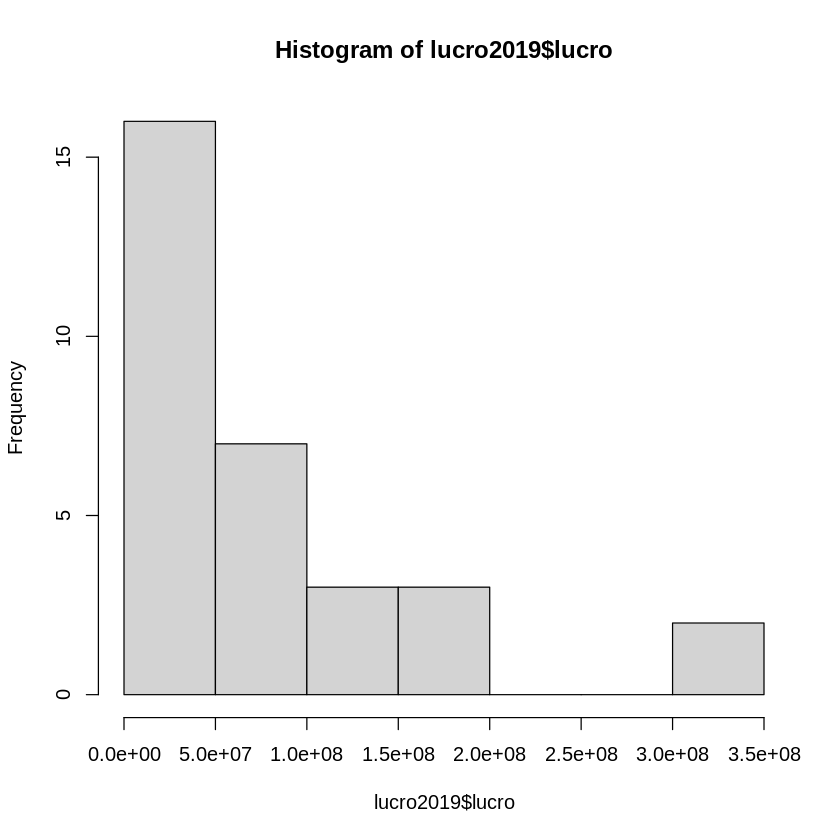

In [105]:
hist(lucro2017$lucro)
hist(lucro2018$lucro)
hist(lucro2019$lucro)

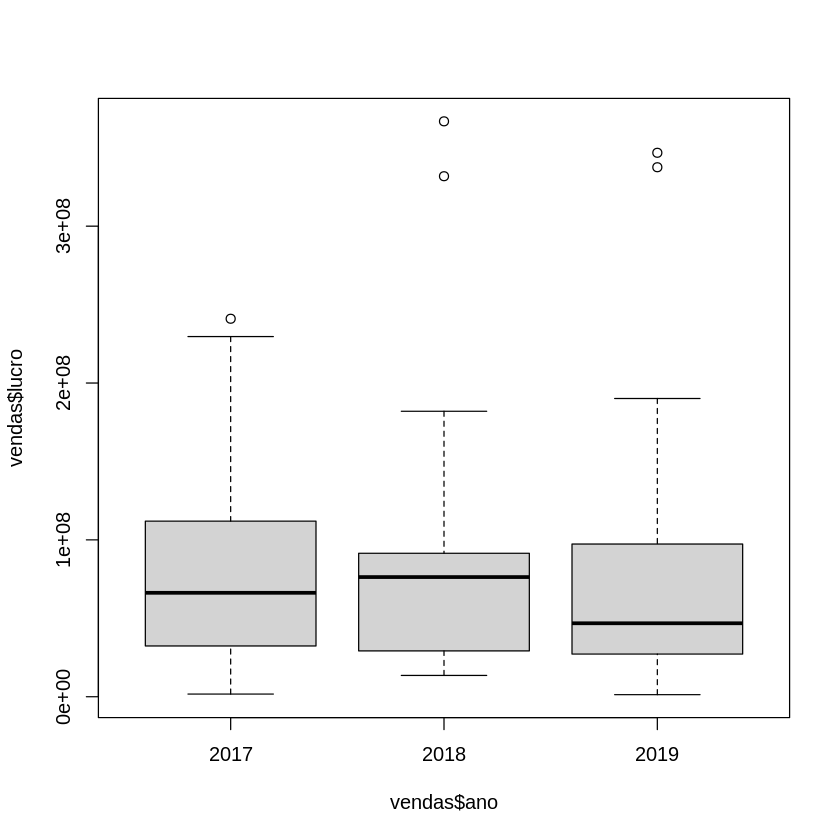

In [112]:
boxplot(vendas$lucro ~ vendas$ano)